In [1]:
#Importación de módulos
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#Lectura del archivo .csv y conversión a df
file='synergy_logistics_database.csv'
df=pd.read_csv(file)

df['date']= pd.to_datetime(df['date'])
df.head()


,register_id,direction,origin,destination,year,date,product,transport_mode,company_name,total_value
0,1,Exports,Japan,China,2015,2015-01-31,Cars,Sea,Honda,33000000
1,2,Exports,Japan,China,2015,2015-01-02,Cars,Sea,Honda,16000000
2,3,Exports,Japan,China,2015,2015-02-02,Cars,Sea,Honda,29000000
3,4,Exports,Japan,China,2015,2015-03-02,Cars,Sea,Honda,14000000
4,5,Exports,Japan,China,2015,2015-04-02,Cars,Sea,Honda,17000000


In [2]:
#creación de un diccionario que busca la lista única en todo el dataframe introducido y cuenta las recurrencias
def ExpImpDict(DF,ListaExpImp):
    dictExp={}
    for countries in ListaExpImp: 
        A=DF.loc[(DF['origin'] == countries[0])&(DF['destination'] == countries[1])&(DF['transport_mode'] == countries[2])]
        count_row = A.shape[0]
        dictExp[countries[0],countries[1],countries[2]]=count_row
    return(dictExp)

In [3]:
#creación de un diccionario que busca la lista única en todo el dataframe introducido y cuenta las ganancias
def TransportDict(DF,ListaTransport):
    DF['total_value']=DF['total_value'].astype(int)
    dictExp={}
    for transport_mode in ListaTransport:
        suma=0
        A=DF.loc[(DF['transport_mode'] == transport_mode[0])]
        suma = A['total_value'].sum()
        dictExp[transport_mode[0]]=suma
    return(dictExp)

In [4]:
#Identificación de los países que aportan el 80% de ganancias
def paises80(DF,Lista):
    Total=DF['total_value'].sum() #se encuentra la suma total de todas las importaciones y exportaciones
    Total80=Total*0.8           #se encuentran el valor del 80% de las ganancias
    
    countries=[]                  #se inicializan variables
    topcountries=[]
    sumatotal=0
    
    for pais in Lista:            #se encuentran las ganancias de cada país de origen
        suma=0
        A=DF.loc[(DF['origin'] == pais[0])]
        suma=A['total_value'].sum()
        countries.append([pais[0],suma])
    
    countries.sort(reverse=True, key=lambda x: x[1]) #se organizan los países de mayor a menor ganancias
    
    for pais in countries:        #se encuentran los países que proveen aproximadamente el 80% de ganancias
        if sumatotal<=Total80:
            sumatotal=sumatotal+pais[1]
            topcountries.append([pais[0],pais[1],sumatotal])
        else: break
    return(topcountries)

In [5]:
#Sorteo de las 10 mayores rutas de exportación e importación
def sorteo(Diccionario, num):
    Sort=sorted(Diccionario.items(), key=lambda x:x[1], reverse=True)[:num]
    return(Sort)

In [6]:
#Identificación de Exportaciones e Importaciones
TotExp=df.loc[df['direction'] == 'Exports']
TotImp=df.loc[df['direction'] == 'Imports']

In [7]:
#Generación de listas con los valores únicos encontrados de pares origen/destino
UnExp=TotExp.drop_duplicates(subset=['origin','destination','transport_mode'])   #Parámetros discriminantes: origen y destino
ODExp=UnExp.drop(UnExp.columns[[0,1,4,5,6,8,9]], axis=1)      #Eliminación de columnas que no sean ni origen ni destino
ListaExp = ODExp.values.tolist()                                #Generación de una lista de listas con los pares únicos origen/destino

UnImp=TotImp.drop_duplicates(subset=['origin','destination','transport_mode'])
ODImp=UnImp.drop(UnImp.columns[[0,1,4,5,6,8,9]], axis=1)
ListaImp = ODImp.values.tolist()

Trans=df
VTIE=df

#Generación de lista con los valores únicos encontrados de modos de transporte
UnTrans=Trans.drop_duplicates(subset=['transport_mode'])
ODTrans=UnTrans.drop(UnTrans.columns[[0,1,2,3,4,5,6,8,9]], axis=1)
ListaTrans=ODTrans.values.tolist()

#Generación de lista con los valores únicos encontrados de países tanto exportadores como importadores
UnVTIE=VTIE.drop_duplicates(subset=['origin'])
ODVTIE=UnVTIE.drop(UnVTIE.columns[[0,1,3,4,5,6,7,8,9]], axis=1)
ListaVTIE=ODVTIE.values.tolist()

In [8]:
#Creación de los diccionarios de exportación/importación y transporte
DictExp=ExpImpDict(TotExp,ListaExp)
DictImp=ExpImpDict(TotImp,ListaImp)
DictTrans=TransportDict(Trans,ListaTrans)

In [9]:
#Sorteo de las  rutas de exportación e importación y de transporte
Top10Exp=sorteo(DictExp, len(DictExp))
Top10Expdf =pd.DataFrame(Top10Exp, columns =['Ruta','cuenta'])

Top10Imp=sorteo(DictImp, len(DictImp))
Top10Impdf =pd.DataFrame(Top10Imp, columns =['Ruta','cuenta'])

Top3Trans=sorteo(DictTrans, len(DictTrans))
Top3Transdf=pd.DataFrame(Top3Trans,columns =['Medio','Ganancia'])

#Búsqueda de los países que conforman aproximadamente el 80% de valor de exportaciones e importaciones
Top80=paises80(VTIE,ListaVTIE)
Top80df=pd.DataFrame(Top80,columns =['País','Ganancia','Ganancia acumulativa'])
Porcentaje=Top80[-1][2]*100/VTIE['total_value'].sum()

# Análisis de datos para Synergy Logistics

## Introducción

El análisis de datos es ampliamente utilizado para la toma de decisiones en ambientes empresariales cuando se maneja una cantidad grande de información y se buscan optimizar y compactar resultados. En este caso, se nos pide realizar un análisis de datos para Synergy Logistics, una empresa de exportación e importación de bienes materiales en varios países del mundo. Se nos solicita otorgar, a partir de nuestro análisis, una guía de los pasos próximos que la empresa debería tomar.

El siguiente proyecto analizará y discutirá 3 posibles opciones:
##### Opción 1: Rutas de importación y exportación. 
Synergy logistics está considerando la posibilidad de enfocar sus esfuerzos en las 10 rutas más demandadas. Acorde a los flujos de importación y exportación, ¿cuáles son esas 10 rutas? ¿le conviene implementar esa estrategia? ¿porqué?
##### Opción 2: Medio de transporte utilizado. 
¿Cuáles son los 3 medios de transporte más importantes para Synergy logistics considerando el valor de las importaciones y exportaciones? ¿Cuál es medio de transporte que podrían reducir?
##### Opción 2: Valor total de importaciones y exportaciones.
Si Synergy Logistics quisiera enfocarse en los países que le generan el 80% del valor de las exportaciones e importaciones ¿en qué grupo de países debería enfocar sus esfuerzos?

## Opción 1: Rutas de importación y exportación
Para realizar este inciso se consideraron las rutas con un origen, destino y medio de transporte únicos. Se observa que las rutas tienen una forma de exponencial decreciente.

<br>Observando las 10 rutas principales de Exportación se tiene la gráfica 1. En ella se aprecia que las 10 rutas más demandadas de exportación son: 
<br>1 .- South Korea - Vietnam :    497 por Mar
<br>2 .- USA - Netherlands :        436 por Mar
<br>3 .- Netherlands - Belgium :    374 por Tierra
<br>4 .- China - Mexico :           330 por Aire
<br>5 .- Japan - Brazil :           306 por Mar
<br>6 .- Germany - France :         299 por Tierra
<br>7 .- South Korea - Japan :      279 por Mar
<br>8 .- Australia - Singapore :    273 por Mar
<br>9 .- Canada - Mexico :          261 por Tren
<br>10 .- China - Spain :           250 por Aire

<br>Se puede ver que, a pesar de que las recurrencias de exportación bajan, es aún muy significativa la cantidad de ingresos que las demás rutas no pertenecientes al Top 10 de exportaciones proveen a esta compañía. A partir del lugar 58 es cuando las exportaciones por ruta son de 100 o menos y aún así no convendría recortarlas. Por ello llevar a cabo esta opción con la parte de las exportaciones no es lo óptimo para esta empresa.

<br>Analizando las 10 rutas principales de Importación se tiene la gráfica 2. En ella se aprecia que las 10 rutas más demandadas de importación son: 
<br>1 .- Singapore - Thailand :  273 por Mar
<br>2 .- Germany - China :  233 por Mar
<br>3 .- China - Japan :  210  por Aire
<br>4 .- Japan - Mexico :  206 por Mar
<br>5 .- Malaysia - Thailand :  195  por Tren
<br>6 .- China - Thailand :  145 por Tierra
<br>7 .- Spain - Germany :  142  por Tierra
<br>8 .- China - United Arab Emirates :  114  por Mar
<br>9 .- Brazil - China :  113  por Mar
<br>10 .- USA - Thailand :  109  por Mar

<br>En caso de querer focalizar rutas, se recomendaría observar cuáles son las peores 10 y de ahí decidir recortar esas rutas. Asimismo, se podría definir un número de recurrencias que una ruta debe tener en un periodo de tiempo y en caso de que no se cumpla por más de dos años seguidos, considerar eliminarla. No es viable enfocarse solamente en los Top 10 de importación ni de exportación.


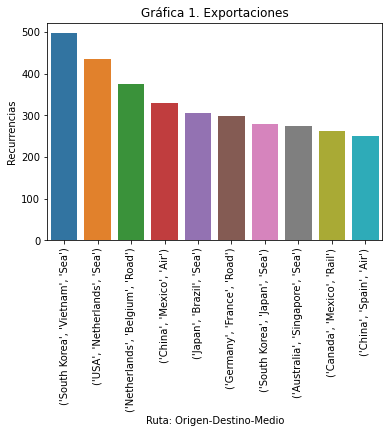

In [10]:
graphExp=sns.barplot(data=Top10Expdf.head(10), x="Ruta", y="cuenta").set(title="Gráfica 1. Exportaciones",xlabel="Ruta: Origen-Destino-Medio",ylabel="Recurrencias")
graphExp=plt.xticks(rotation=90)

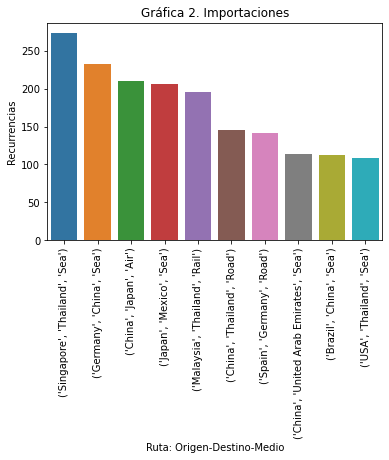

In [11]:
graphImp=sns.barplot(data=Top10Impdf.head(10), x="Ruta", y="cuenta").set(title="Gráfica 2. Importaciones",xlabel="Ruta: Origen-Destino-Medio",ylabel="Recurrencias")
graphImp=plt.xticks(rotation=90)

## Opción 2: Medio de transporte utilizado
Para realizar este inciso se filtraron todos los medios de transporte proveídos en la base de datos de Synergy Logistics. Es posible observar que el medio más usado, ganando por más del doble a sus contrincates es el medio del mar. Sin embargo, enfocarse solamente en el top 3 de medios recortaría los ingresos de la empresa en casi 25% mediante el uso del tren, por lo que limitar la forma de transporte tampoco sería lo más monetariamente adecuado para Synergy Logistics.

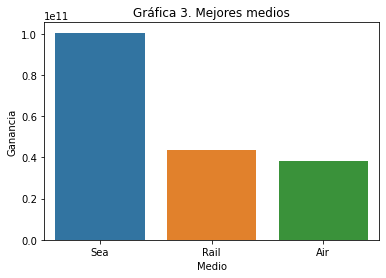

In [12]:
graphRuta=sns.barplot(data=Top3Transdf.head(3), x="Medio", y="Ganancia").set(title="Gráfica 3. Mejores medios")

## Opción 3: Valor total de importaciones y exportaciones
Para evaluar esta opción se identificaron los países exportadores e importadores y, de las ganancias totales, se encontró los que representaban el 80%. Dentro de las 3 opciones ésta es la mejor. Permitiría enfocar los esfuerzos en rutas dominantes y proveer un mejor servicio en ellas. Las rutas secundarias podrían equilibrarse a largo plazo, compensando el 20% recortado y sería la opción que menos impacto económico tendría hacia la empresa. Los países encontrados conforman un 81.1% aproximadamente de las ganancias.

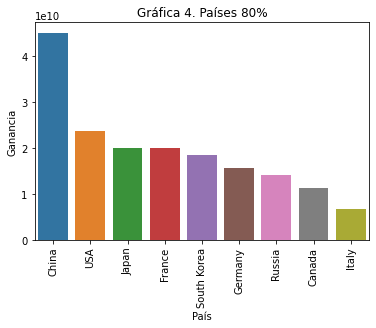

In [13]:
graphTop80=sns.barplot(data=Top80df, x="País", y="Ganancia").set(title="Gráfica 4. Países 80%")
graphTop80=plt.xticks(rotation=90)

## Conclusión
A partir del análisis realizado es posible decidir satisfactoriamente que la mejor forma de proceder es enfocando la atención en el 80% de los países que más ingresos le otorguen a Synergy Logistics. Las demás opciones tienen un impacto más fuerte en el ámbito económico de la empresa y no parece que tengan una recuperación viable en un futuro próximo. Es posible conlcuir que el país más importante para Synergy Logistics es China, siendo el principal exportador y generador de ingresos a la empresa. Asimismo, un análisis más profundo podría dar más introspección al problema pero como no fue requirido como consigna, no se realizó en este reporte. Por otro lado, existen muchas formas de realizar este proyecto. Sin embargo, fue resuelto con los conocimientos actuales del data analyst, el cual mejorará todos los días.

## Agradecimientos
A Jaime y EmTech por esta oportunidad. Pythonista por siempre.